First, we will import the librares that we need

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import RidgeClassifier
import matplotlib.pyplot as plt

Now, we will import the dataframe 

In [2]:
df = pd.read_csv('pima-indians-diabetes.csv')
df

,Pregnancies,Plasma Glucose Concentration,Diastolic blood pressure,Triceps skinfold thickness,serum insulin,BMI,Diabetes pedigree function,Age,Class Variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


To train the model with our data, we must split the data into 2 parts. Training data and Testing data. Next, we will use cross validation to determine the best model and train the data. I will use 10 folds, meaning that 1/10 of the data will be taken as test data. This leaves 9/10 of the data for training the model.

In [3]:
xtrain = df.drop(['Class Variable'],axis=1)
ytrain = df['Class Variable']
print(ytrain)
cv = KFold(n_splits=10)


0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Class Variable, Length: 768, dtype: int64


Now, we can use different methods of classification through sci kit learn to create models

First, we will use K-nearest neighbour classifier

In [4]:
knn = KNeighborsClassifier()


The KNN classifier has many parameters that can alter the accuracy of a model. Therefore, we will test the model using a few values for each parameter in an attempt to create an accurate model. However, we must be careful of overfitting the data. This means we will not use 1-nearest neighbour, or other parameters that will cause overfitting

In [5]:
param_grid = {'n_neighbors':[3,5,10,15,20],'metric': ['euclidean','manhattan','minkowski']}

params=GridSearchCV(knn,param_grid=param_grid,cv=cv,scoring='accuracy')

params.fit(xtrain,ytrain)

scores=cross_val_score(params,xtrain,ytrain,cv=cv)
print(params.best_params_)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
print('Test Accuracy for the KNN classifier model is: '+ str(params.best_score_))

{'metric': 'manhattan', 'n_neighbors': 15}
0.76 accuracy with a standard deviation of 0.06
Test Accuracy for the KNN classifier model is: 0.7617224880382775


GridSearchCV says that our best parameters for the most accurate model is k=15, and using manhattan to measure the distance

We are also given the test accuracy of our model, which is 76%. This is pretty good for the pima indian dataset. Now, we can test for overfitting by getting the accuracy of the model on the training data only. If the accuracy is almost identical, we know that the model is overfitted 

In [6]:
knnBP = KNeighborsClassifier(n_neighbors=15,metric='manhattan')
knnBP.fit(xtrain,ytrain)
predictions=knnBP.predict(xtrain)
print("Train accuracy",metrics.accuracy_score(predictions,ytrain))

Train accuracy 0.78515625


Now we will use Ridge Classifier as a classification model

In [7]:
Ridge = RidgeClassifier()



Ridge Classification has a parameter Alpha that we can hypertune. Once again, we can use GridSearch

In [8]:
alphas = {'alpha':[1e-10,1e-8,1e-3,1e-2,1,5,10,20,25]}
RidgeParams= GridSearchCV(Ridge, param_grid=alphas,cv = cv, scoring = 'accuracy')
RidgeParams.fit(xtrain,ytrain)
RidgeScores=cross_val_score(Ridge, xtrain, ytrain, cv=cv)

print("%0.2f accuracy with a standard deviation of %0.2f" % (RidgeScores.mean(), RidgeScores.std()))
print('Test Accuracy for the ridge classifier model is: '+ str(RidgeParams.best_score_))
print('Best parameter for the ridge regression model is: '+ str(RidgeParams.best_params_))


0.77 accuracy with a standard deviation of 0.05
Test Accuracy for the ridge classifier model is: 0.7708646616541354
Best parameter for the ridge regression model is: {'alpha': 1e-10}


Now, We can visualize our models by plotting their ROC curve

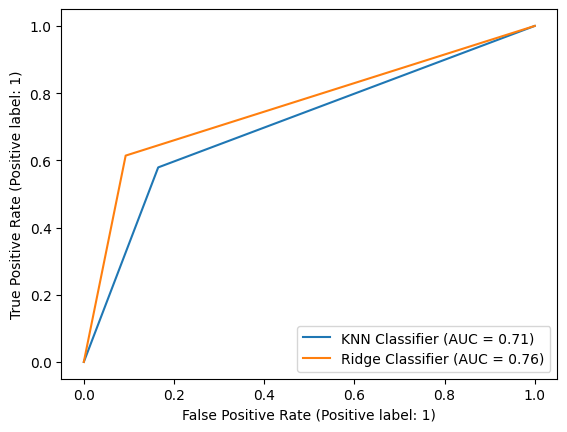

In [9]:
xtrain2, xtest, ytrain2, ytest = train_test_split(xtrain, ytrain, test_size=0.2)
KNNClassifier = KNeighborsClassifier(n_neighbors=15,metric='manhattan')
KNNClassifier.fit(xtrain2,ytrain2)
KNNPredictions = KNNClassifier.predict(xtest)
metrics.RocCurveDisplay.from_predictions(ytest,KNNPredictions,name="KNN Classifier",ax=plt.gca())

RidgeClassifier = RidgeClassifier(alpha=1e-10)
RidgeClassifier.fit(xtrain2,ytrain2)
RidgePredictions = RidgeClassifier.predict(xtest)
metrics.RocCurveDisplay.from_predictions(ytest,RidgePredictions,name="Ridge Classifier",ax=plt.gca())


We will choose to use the model that has the higher AUC because the higher the AUC, the better the model is at identifying positive or negative cases. In our case, we can choose the Ridge Classifier

## Conclusion

In our case, to determine whether the pima indians will develop diabetes in the next 5 years, we should choose the ridge classifer as it is more accurate than the KNN classifier.